In [8]:
import pandas as pd

###`Q-1:` You are given a Multi index DataFrame. You task is to swap level-0 index with level-0 column.
* Change Branch -> ('cse', 'ece') as columns at level-0 and ('delhi'	'mumbai') as level-0 Index
* And Sort on row index level-0

In [9]:
# Given Code Snippets
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
df = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = multiindex,
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

df

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [19]:
# code here
df.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()

C:\Users\saiyyam agrawal\AppData\Local\Temp\ipykernel_30528\2802933979.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()


cse         ece      cse      ece
            avg_package avg_package students students
delhi  2019           1           9        2       10
       2020           3          11        4       12
       2021           5          13        6       14
       2022           7          15        8       16
mumbai 2019           0           0        0        0
       2020           0           0        0        0
       2021           0           0        0        0
       2022           0           0        0        0

###`Q-2:` Covid Cases Data Set Problem
 Make a DataFrame Using both Covid Dataset. With Country name as Level-0 and Provinance/State as Level-1 Index and date, No of cases and No of Deaths as Columns.

In [105]:
confirm = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTmqT3kxd0i0RUFiEnwA1Hboiunv28MeNTatZsIEqlPPB7mHrl0ttJL7utZ23_1s5FW8ZjODmB8jHIi/pub?gid=2142019845&single=true&output=csv')

deaths = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQn4nLCKIVZMw4e89YeRqgKaSAAwRFaZ6ILMW_FUejZ2tkv3Np1f9gD4QOl3ASHeLzWjOjfmLDKcCOF/pub?gid=212966958&single=true&output=csv")

In [106]:
# confirm
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4019,4019,4022,4022,4023,4023,4024,4024,4024,4024


In [107]:
# code her
confirms = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='cases')
total_deaths = deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='total_deaths')



In [108]:
original_df = confirms.merge(total_deaths,on=['Province/State','Country/Region','Lat','Long','date'])
original_df

,Province/State,Country/Region,Lat,Long,date,cases,total_deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0
...,...,...,...,...,...,...,...
311248,NaN,West Bank and Gaza,31.952200,35.233200,1/2/23,703228,5708
311249,NaN,Winter Olympics 2022,39.904200,116.407400,1/2/23,535,0
311250,NaN,Yemen,15.552727,48.516388,1/2/23,11945,2159
311251,NaN,Zambia,-13.133897,27.849332,1/2/23,334661,4024


In [109]:
# final_df.set_index(['Province/State','Country/Region'],inplace=True)
final_df = original_df[['date','cases','total_deaths']]

###`Q-3:` Show Country with Heighest death percent out of confirmed Cases.

In [113]:
temp_df = original_df.groupby('Country/Region').sum()
temp_df['death_percentage'] = (temp_df['total_deaths']/temp_df['cases'])*100
temp_df.sort_values('death_percentage',ascending=False)


,Province/State,Lat,Long,date,cases,total_deaths,death_percentage
Country/Region,,,,,,,
"Korea, North",0,43446.072300,137328.377700,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,234,1404,600.000000
MS Zaandam,0,0.000000,0.000000,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,9071,2014,22.202624
Yemen,0,16750.286979,52252.149876,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,7091065,1372952,19.361718
Sudan,0,13853.235600,32544.355200,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,38729339,2850576,7.360250
Peru,0,-9897.630000,-80791.370400,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,2203724423,156296296,7.092370
...,...,...,...,...,...,...,...
Antarctica,0,-77490.042300,25144.719000,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,4235,0,0.000000
Holy See,0,45129.423300,13412.311800,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,24893,0,0.000000
Summer Olympics 2020,0,38394.080700,150536.274900,1/22/201/23/201/24/201/25/201/26/201/27/201/28...,441598,0,0.000000


### `Q-4` : Make a dataframe for India from Covid Data with one extra column representing no of new cases.

* Just for Assumption "No of new cases" will be equal to difference of "no of cases" with previous day.
* First day new cases will be NaN or equal to no of cases

Say on 12/30/22 No of cases is - 44679608	and a day previous (12/29/22) no of cases is - 44679382.

Then for 12/30/22 -> No of New Cases  = 44679608 - 44679382 =

Note:- Try using shift Function

Try using the shift function

```
s = pd.Series([1,2,3,4,5,6])
s #-> [1,2,3,4,5,6]
s.shift(1) #-> [NaN, 1,2,3,4,5]
s.shift(-1) #-> [2,3,4,5,6, NaN]
```

In [136]:
# code here
original_df.set_index(['Country/Region','Province/State'],inplace=True)
# original_df.index
# original_df[('nan','Afganistan']

KeyError: "None of ['Country/Region', 'Province/State'] are in the columns"

### `Q-5:` Read the Dataset using the below given link and create a multi-index dataframe using the columns "Country" and "City/Town".

This dataset is about the most polluted cities in the world. You can get details from [here](https://www.kaggle.com/datasets/rajkumarpandey02/worlds-most-air-polluted-countries-cities).

**Dataset link:** https://tinyurl.com/2fe6vz4u Directly use this link to read.

**Task:**
1. Find out the name of the city of India which is most poluted based on PM10.
2. Find out the name of the city of India which has minumum pollution level based on PM10.
3. Do same operations (like 1 and 2) with the country China.
4. Make a pie chart based on the column "PM10" of the country Poland.
5. Make a bar chart based on the columns "PM2.5" and "PM10" of the countries Israel and Qatar.
6. Convert this MultiIndex DataFrame to Series by retaining the informations.

In [137]:
# code here
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')

In [140]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df

,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,2,India,Faridabad,2016,172,>75%,316,NaN,2018
2,3,India,Gaya,2016,149,50% -< 75%,275,NaN,2018
3,4,India,Varanasi,2016,146,>75%,260,NaN,2018
4,5,India,Patna,2016,144,>75%,266,NaN,2018
...,...,...,...,...,...,...,...,...,...
495,496,Poland,Lublin,2016,27,>75%,31,>75%,2018
496,497,Poland,Siedlce,2016,27,>75%,29,>75%,2018
497,498,Poland,Trzebinia,2016,27,>75%,35,>75%,2018
498,499,El Salvador,San Salvador,2016,27,50% -< 75%,59,NaN,2018


In [144]:
df.set_index(['Country','City/Town'],inplace=True)

In [146]:
df_India = df.loc['India']

In [150]:
df_India.sort_values('PM10',ascending=False).head(1).index[0]

'Kanpur'

In [151]:
df_India.sort_values('PM10',ascending=False).tail(1).index[0]

'Aizawl'

In [153]:
df_china = df.loc['China']

In [154]:
df_china 

,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,
Baoding,19,2016,93,NaN,147,NaN,2018
Jinan,22,2014,90,NaN,192,NaN,2018
Shijiazhuang,23,2015,89,NaN,147,NaN,2018
Hengshui,25,2016,87,NaN,143,NaN,2018
Xingtai,26,2016,87,NaN,186,NaN,2018
...,...,...,...,...,...,...,...
Fuzhou,478,2016,27,NaN,50,NaN,2018
Haixi,479,2016,27,NaN,65,NaN,2018
Huizhou,480,2016,27,NaN,45,NaN,2018


In [155]:
df_china.sort_values(['PM10'],ascending=False)

,Position,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
City/Town,,,,,,,
Jinan,22,2014,90,NaN,192,NaN,2018
Xingtai,26,2016,87,NaN,186,NaN,2018
Handan,34,2016,82,NaN,175,NaN,2018
Linfen,52,2016,74,NaN,158,NaN,2018
Anyang,27,2016,86,NaN,155,NaN,2018
...,...,...,...,...,...,...,...
Zhongshan,417,2016,30,NaN,44,NaN,2018
Putian,436,2016,29,NaN,43,NaN,2018
Eerduosi,452,2014,28,NaN,42,NaN,2016


In [156]:
df_china.sort_values(['PM10'],ascending=False).head(1).index[0]

'Jinan'

In [157]:
df_china.sort_values(['PM10'],ascending=False).tail(1).index[0]

'Anshun'

In [160]:
df_poland = df.loc['Poland']

<Axes: ylabel='PM10'>

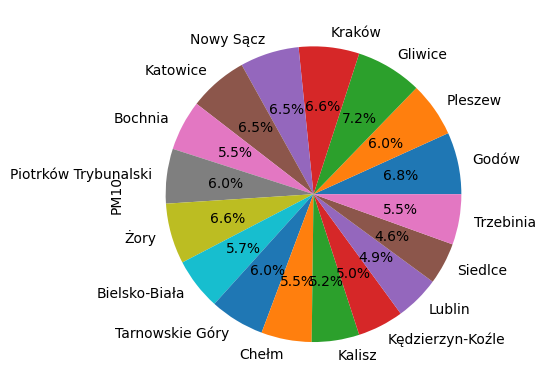

In [168]:
df.loc['Poland']['PM10'].plot(kind='pie',autopct='%0.1f%%')

<Axes: xlabel='Country,City/Town'>

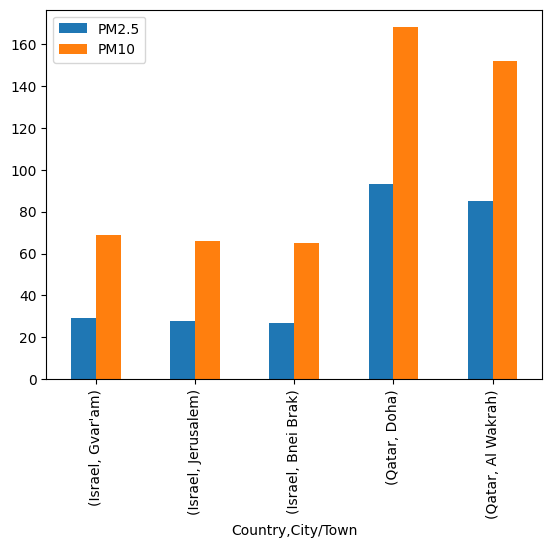

In [170]:
df.loc[['Israel','Qatar']][['PM2.5','PM10']].plot(kind='bar')

In [171]:
df.stack()

Country  City/Town                         
India    Kanpur     Position                      1
                    Year                       2016
                    PM2.5                       173
                    Temporal coverage          >75%
                    PM10                        319
                                               ... 
Turkey   Sivas      PM2.5                        27
                    Temporal coverage          >75%
                    PM10                         56
                    Temporal coverage.1        >75%
                    Database version (year)    2018
Length: 2638, dtype: object